In [96]:
#---------- Amit, Ankita, Darshan, Sagar-------

import pandas as pd  #---https://pandas.pydata.org/----
import pyLDAvis
import pyLDAvis.gensim
import numpy as np

#----Preprocessing and Stemming--------
#All the codes are refered for pre-processing are refered from --https://www.nltk.org----------
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer=PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

#-----------WORD CLOUD----------
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darshan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
#-----------Getting the input file-------------

data = pd.read_csv('Newsdata.csv',encoding='cp932', error_bad_lines=False);
data_text = data[['Content']]
Business=data[data.Type=='Business']
Sport=data[data.Type=='Sport']
Technology=data[data.Type=='Technology']
Entertainment=data[data.Type=='Entertainment']
Politics=data[data.Type=='Politics']

In [98]:
#---------Dividing data to training and testing -----------
train=data.sample(frac=0.75,random_state=200)
test=data.drop(train.index)
#Business News
Business_train=Business.sample(frac=0.75,random_state=200)
Business_test=Business.drop(Business_train.index)
#Sport News
Sport_train=Sport.sample(frac=0.75,random_state=200)
Sport_test=Sport.drop(Sport_train.index)
#Technology
Technology_train=Technology.sample(frac=0.75,random_state=200)
Technology_test=Technology.drop(Technology_train.index)
#Entertainment
Entertainment_train=Entertainment.sample(frac=0.75,random_state=200)
Entertainment_test=Entertainment.drop(Entertainment_train.index)
#Politics
Politics_train=Politics.sample(frac=0.75,random_state=200)
Politics_test=Politics.drop(Politics_train.index)

train=Business_train
train=train.append(Sport_train)
train=train.append(Technology_train)
train=train.append(Entertainment_train)
train=train.append(Politics_train)
test=Business_test
test=test.append(Sport_test)
test=test.append(Technology_test)
test=test.append(Entertainment_test)
test=test.append(Politics_test)

data_text = train[['Content']]
data_text['index'] = data_text.index
documents = data_text

data_text_test = test[['Content']]
data_text_test['index'] = data_text_test.index
documents_test = data_text_test

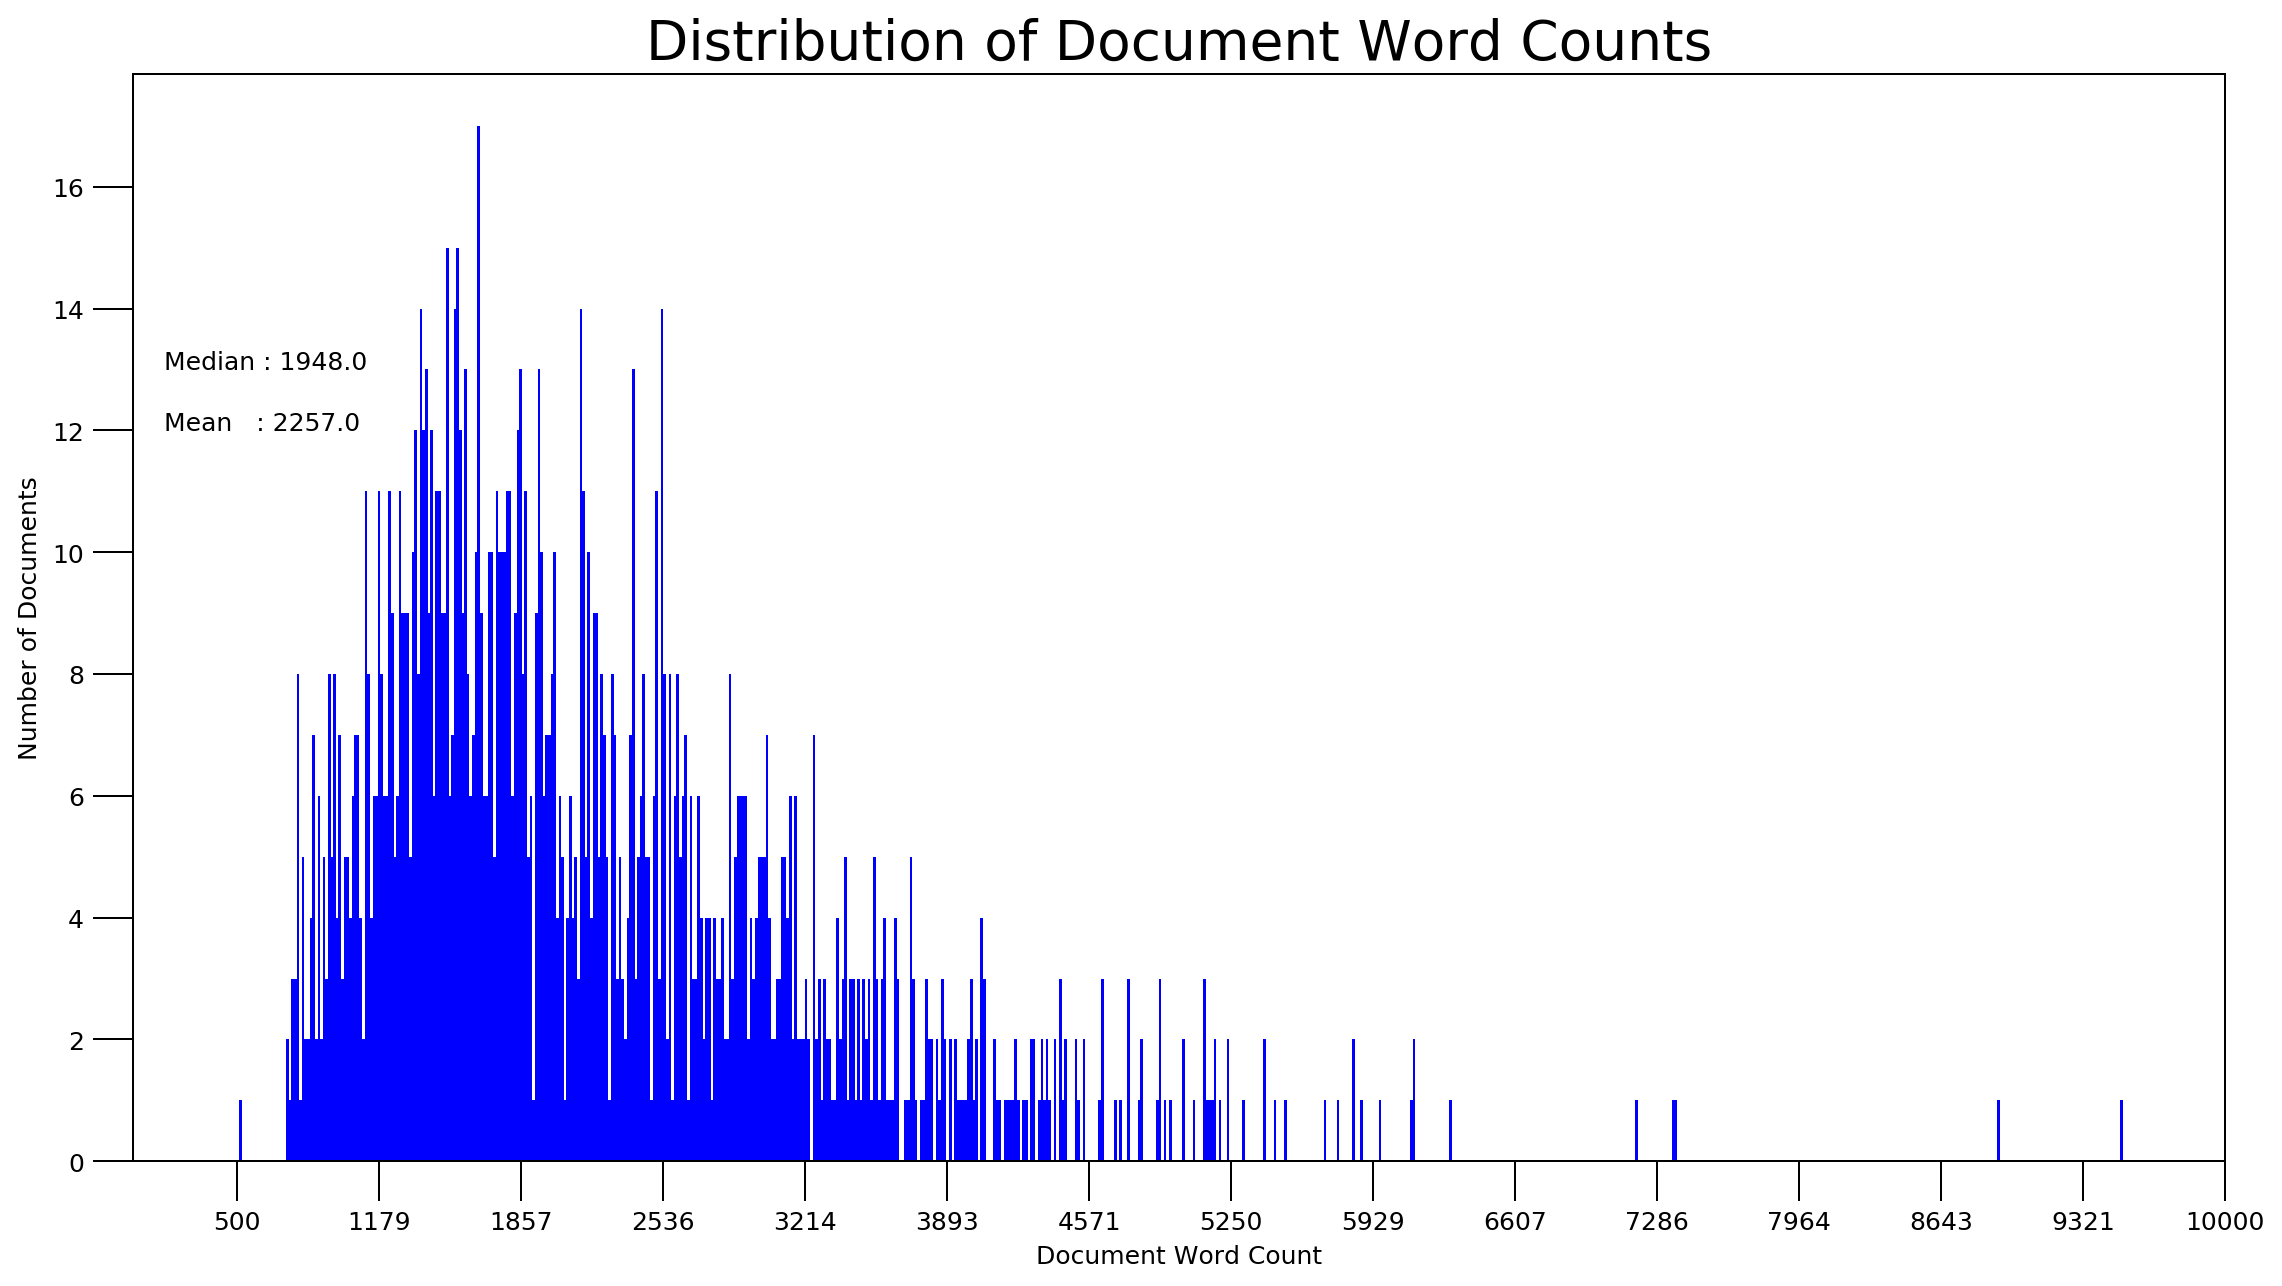

In [99]:
#--------Distribution of Document Word Counts--------

doc_lens = [len(d) for d in data_text.Content]

# Plot
plt.figure(figsize=(15,8), dpi=180)
plt.hist(doc_lens, bins = 1500, color='blue')
plt.text(150, 12, "Mean   : " + str(round(np.mean(doc_lens))),horizontalalignment='left')
plt.text(150, 13, "Median : " + str(round(np.median(doc_lens))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(500,10000,15))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [100]:
#train_labels
train_labels=train[['Type']]
train_labels['index']=train_labels.index
train_labels=train_labels.reset_index()
train_labels.head(len(documents))

,level_0,Type,index
0,602,Business,602
1,1904,Business,1904
2,1825,Business,1825
3,1959,Business,1959
4,1336,Business,1336
5,1055,Business,1055
6,468,Business,468
7,974,Business,974
8,1046,Business,1046
9,1920,Business,1920


In [101]:
#----------Saving the actual labels-------
actual=train_labels['Type']

In [102]:
processed_docs=documents['Content'][:10000].map(preprocess)

In [103]:
#------Forming the dictionary-------
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abid
1 abl
2 accord
3 account
4 accur
5 aggress
6 alarmingli
7 amount
8 analysi
9 analyst
10 antagonist


In [104]:
#---------forming Dictionary---------
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 1),
  (12, 1),
  (13, 6),
  (14, 1),
  (15, 2),
  (16, 2),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 3),
  (24, 2),
  (25, 2),
  (26, 1),
  (27, 10),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 2),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 6),
  (47, 1),
  (48, 1),
  (49, 3),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 5),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 7),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 2),
  (91, 1

In [105]:
#------------Forming tfidf model and tfidf corpus----
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.031094162333228967),
 (1, 0.027594556795611718),
 (2, 0.07143076069148734),
 (3, 0.0626529127764108),
 (4, 0.0626529127764108),
 (5, 0.0572609954207913),
 (6, 0.06062476757836406),
 (7, 0.03093018966413989),
 (8, 0.06000716684852802),
 (9, 0.04554894705899531),
 (10, 0.11180858130509778),
 (11, 0.051544882207350005),
 (12, 0.06418184418837958),
 (13, 0.23071264382412177),
 (14, 0.025827885821450194),
 (15, 0.08230543382939069),
 (16, 0.05747980786440329),
 (17, 0.059414781462678784),
 (18, 0.0660637867291268),
 (19, 0.03582919604145223),
 (20, 0.04623465383921622),
 (21, 0.051200501858429025),
 (22, 0.050885158293181174),
 (23, 0.09041105433261416),
 (24, 0.09490963968168416),
 (25, 0.029490442770229112),
 (26, 0.03605954098601399),
 (27, 0.2066924091183819),
 (28, 0.06418184418837958),
 (29, 0.11353807106959196),
 (30, 0.03176923413546329),
 (31, 0.0881294700508936),
 (32, 0.1328030860567645),
 (33, 0.04468233575528286),
 (34, 0.03410730577874624),
 (35, 0.03247724903201164),
 

In [106]:
#------LDA model was built using gensim libraries and refered from----https://radimrehurek.com/gensim/tutorial.html-------
#-------Building LDA model---------
#lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=10, workers=4)
#for idx, topic in lda_model_tfidf.print_topics(-1):
   #print('Topic: {} Word: {}'.format(idx, topic))

In [107]:
#------LDA saved model-------
lda3=gensim.models.ldamodel.LdaModel.load('ldamodel_alpha0.2')

In [108]:
#------Output table before assigning labels-----------

def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda3[corpus]):
        row = row_list[0] if lda3.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda3.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda3, corpus=bow_corpus, texts=dictionary)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'document_texts']
df_dominant_topic.head(500)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,document_texts
0,0,2.0,0.7263,"bank, economi, rise, growth, govern, china, pr...",0
1,1,2.0,0.7582,"bank, economi, rise, growth, govern, china, pr...",1
2,2,2.0,0.9862,"bank, economi, rise, growth, govern, china, pr...",2
3,3,3.0,0.9031,"labour, blair, elect, parti, lord, brown, mini...",3
4,4,2.0,0.9930,"bank, economi, rise, growth, govern, china, pr...",4
5,5,2.0,0.9940,"bank, economi, rise, growth, govern, china, pr...",5
6,6,2.0,0.4122,"bank, economi, rise, growth, govern, china, pr...",6
7,7,2.0,0.9912,"bank, economi, rise, growth, govern, china, pr...",7
8,8,2.0,0.9902,"bank, economi, rise, growth, govern, china, pr...",8
9,9,2.0,0.9934,"bank, economi, rise, growth, govern, china, pr...",9


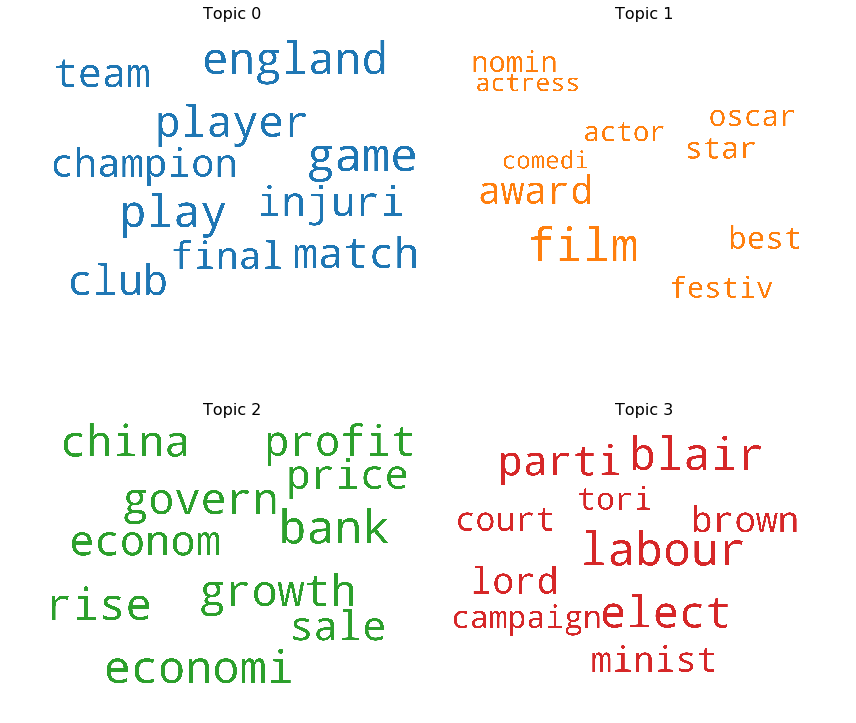

In [109]:
#------Word Cloud----------
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda3.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [110]:
#----------PROJECT OUTPUT------------------

def format_topics_sentences(ldamodel, corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda3, corpus=corpus_tfidf, texts=dictionary)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(len(documents))
output=df_dominant_topic.head(len(documents))

cleanup_var={
    #"Dominant_Topic": {0:"Business",1:"Technology",2:"Politics",4:"Entertainment",3:"Sport"
   "Dominant_Topic": {4:"Technology",2:"Business",3:"Politics",1:"Entertainment",0:"Sport"
                      }
}
output.replace(cleanup_var,inplace=True)
#output["Dominant_Topic"].value_counts()
output.head(500)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Business,0.7638,"bank, economi, rise, growth, govern, china, pr...",0
1,1,Business,0.6763,"bank, economi, rise, growth, govern, china, pr...",1
2,2,Business,0.9221,"bank, economi, rise, growth, govern, china, pr...",2
3,3,Politics,0.9116,"labour, blair, elect, parti, lord, brown, mini...",3
4,4,Business,0.8938,"bank, economi, rise, growth, govern, china, pr...",4
5,5,Business,0.8875,"bank, economi, rise, growth, govern, china, pr...",5
6,6,Politics,0.4579,"labour, blair, elect, parti, lord, brown, mini...",6
7,7,Business,0.8988,"bank, economi, rise, growth, govern, china, pr...",7
8,8,Business,0.8535,"bank, economi, rise, growth, govern, china, pr...",8
9,9,Business,0.8851,"bank, economi, rise, growth, govern, china, pr...",9


In [111]:
#-------Saving the predicted Labels------
predicted=output['Dominant_Topic']
train["Type"].value_counts()

Business         347
Sport            344
Politics         278
Technology       274
Entertainment    257
Name: Type, dtype: int64

In [112]:
#------Forming Confusion Matrix-----
from pandas_ml import ConfusionMatrix
confusion_matrix=ConfusionMatrix(actual, predicted)

confusion_matrix.print_stats()

Confusion Matrix:

Predicted      Business  Entertainment  Politics  Sport  Technology  __all__
Actual                                                                      
Business            276              0        57      0          14      347
Entertainment         4            138        20      1          94      257
Politics            104              0       169      0           5      278
Sport                 0              0        26    318           0      344
Technology            4              1        13      1         255      274
__all__             388            139       285    320         368     1500


Overall Statistics:

Accuracy: 0.7706666666666667
95% CI: (0.748539823703055, 0.7917284848653494)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.7116511381118403
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                 Business Entertainment   Politics  \
Population                                  1500          150

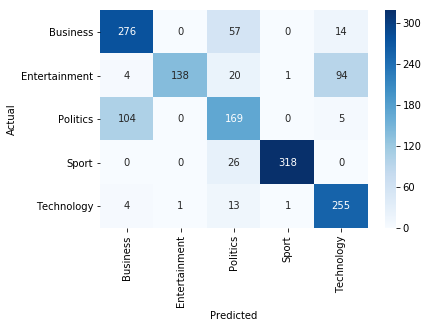

In [113]:
import seaborn as sn
data = {'y_Predicted': predicted,
        'y_Actual':    actual
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap='Blues', fmt='g')

In [115]:
#----------Code are refered from-------https://github.com/bmabey/pyLDAvis
#----------LDA vix interactive visualization------------
lda_vis=pyLDAvis.gensim.prepare(lda3,corpus_tfidf,dictionary)
pyLDAvis.display(lda_vis)

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
D:\NCI Notes\Sem 2 Notes\New folder\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * log

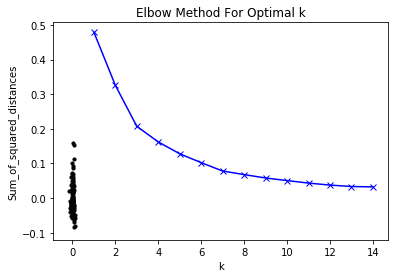

In [116]:
#------For evaluation and to find optimal k value we used Elbow method-------
#------code refered from---https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html----

from sklearn.cluster import KMeans

lda_evaluation_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=120, id2word=dictionary, passes=2, workers=4)

lda_vis_test=pyLDAvis.gensim.prepare(lda_evaluation_model,corpus_tfidf,dictionary)
#pyLDAvis.display(lda_vis_test)
k_input_test=lda_vis_test.topic_coordinates
f1_test = k_input_test['x'].values
f2_test = k_input_test['y'].values
X_test = np.array(list(zip(f1_test, f2_test)))
#plt.scatter(f1, f2, c='black', s=7)
plt.scatter(f1_test, f2_test, c='#050505', s=10)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_test)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()